# Intra-List Similarity
This is a simplified demonstration of intra-list similarity using mock data. Please note that you will need to find your own similarity measure and fitting features for an actual implementation.

![Screenshot 2024-02-23 at 11.05.20.png](<attachment:Screenshot 2024-02-23 at 11.05.20.png>)
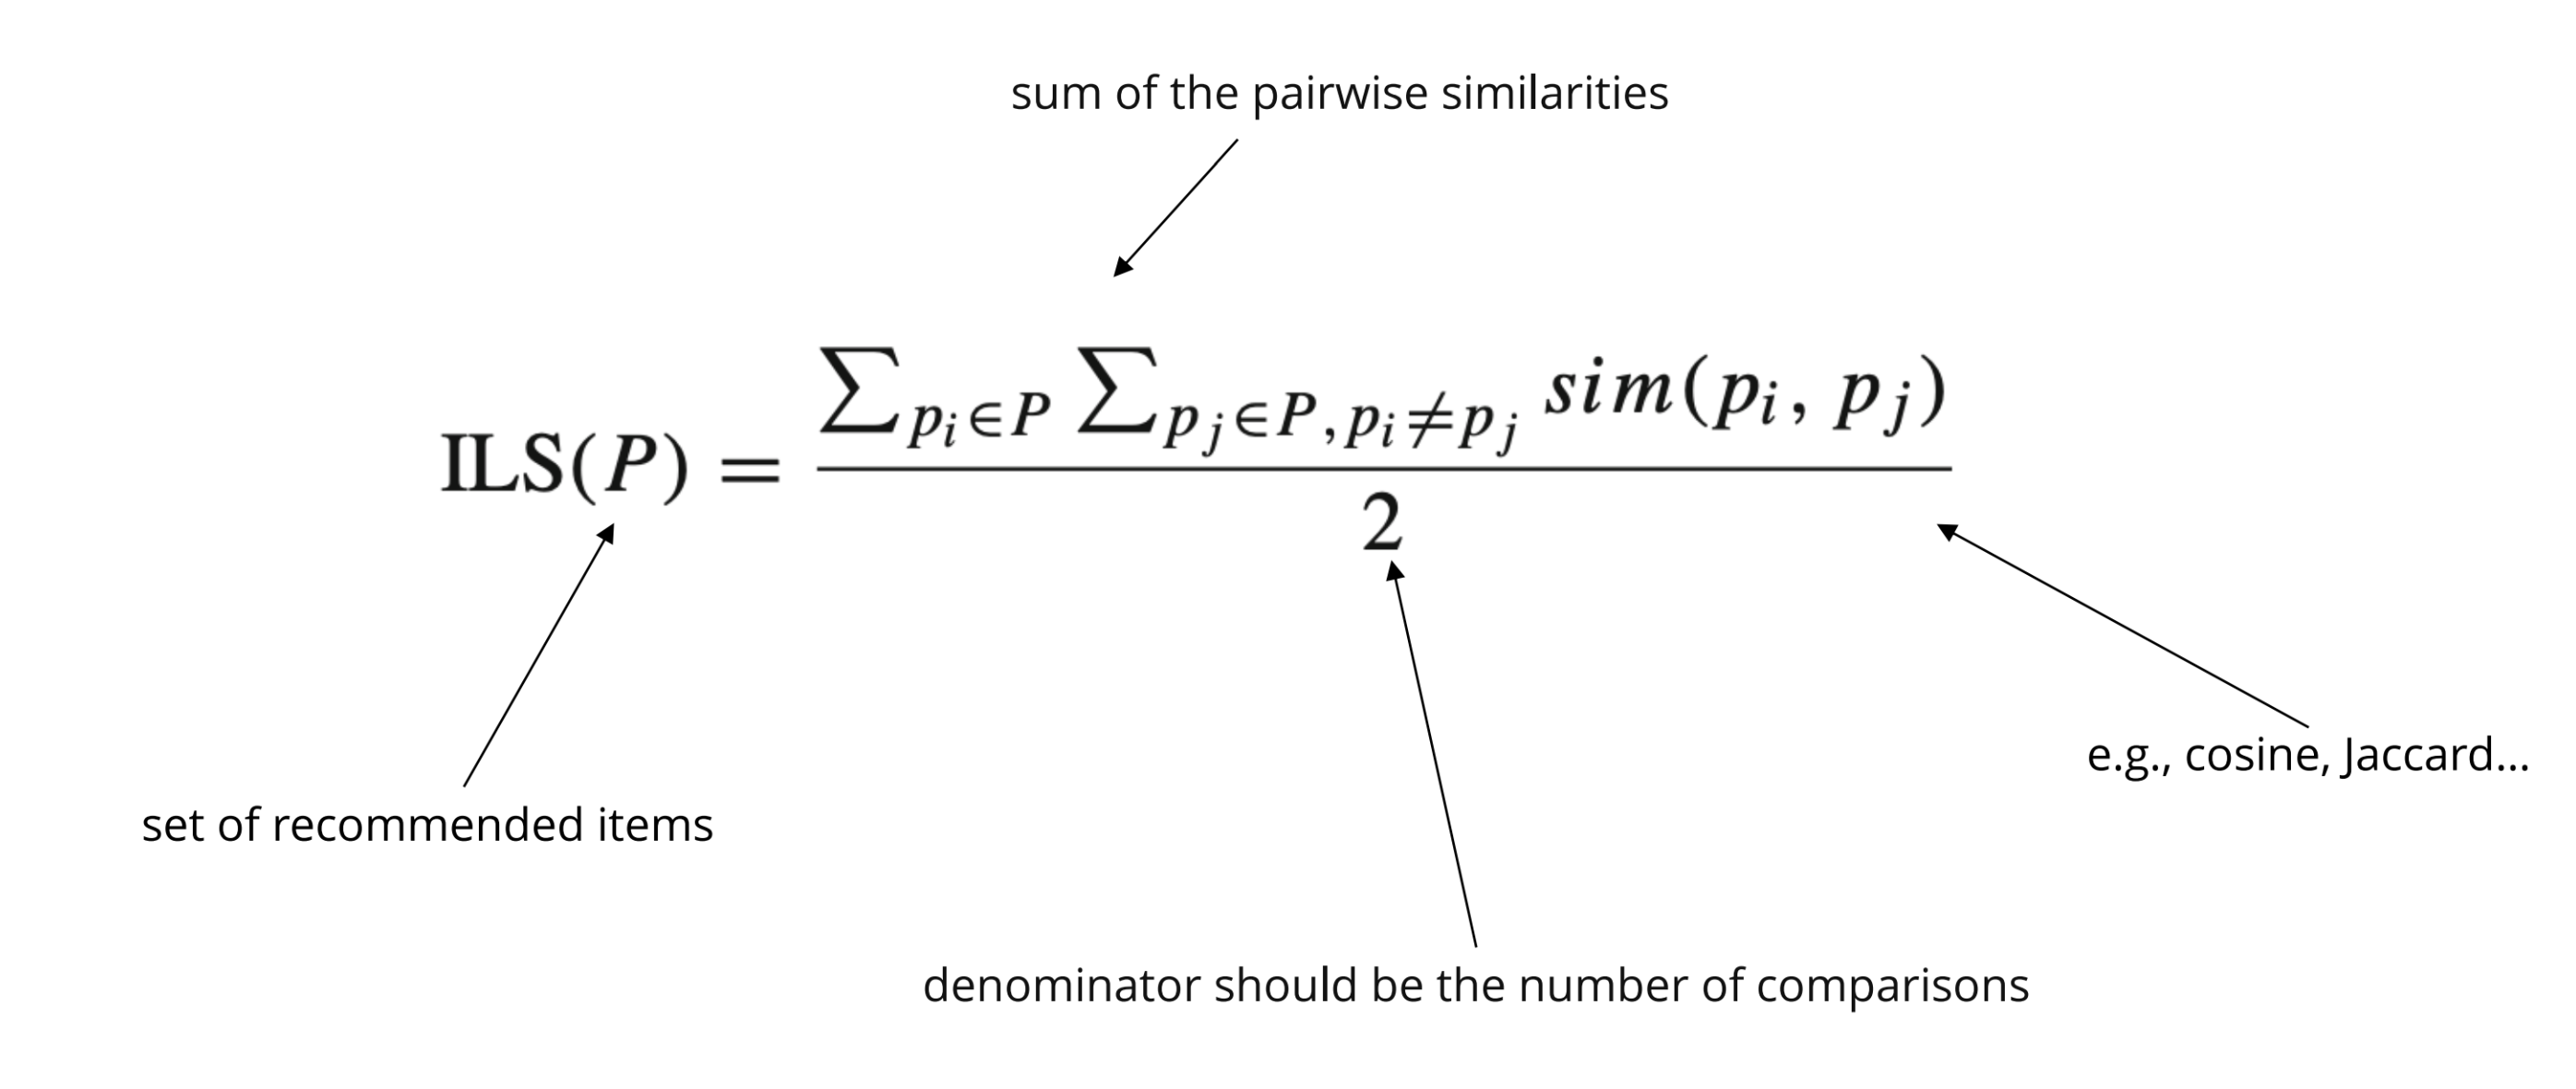

If a recommendation system suggests lists of items that are quite similar to individual users (for instance, a user only getting recommendations for action movies), then the similarity score (ILS) within those lists will be high. So, conversely, low ILS scores indicate higher diversity.

The screenshot above uses Ziegler et al's proposal (2005, https://dl.acm.org/doi/10.1145/1060745.1060754). It is, however, more common to average over all comparisons.

### Option 1: Per list ILS

In [ ]:
#imports
from itertools import combinations

In [ ]:
#simplified movie genre assignment
movies_genres= {
    'Toy Story': ['Family'],
    'Die Hard': ['Action'],
    'Star Wars': ['Sci-Fi'],
    'Titanic': ['Romance'],
    'Serendipity': ['Romance'],
    'Lawrence of Arabia': ['History'],
    'Predator': ['Action'],
    'Face/Off': ['Action'],
    'The Hangover': ['Comedy'],
    'Top Gun': ['Action'],
    'Gangs of New York': ['History'],
    'The Devil Wears Prada': ['Comedy'],
    'Pretty Woman': ['Romance'],
    'Meet the Parents': ['Comedy'],
    'Gladiator': ['Action'],
    'Saving Private Ryan': ['War'],
    'Terminator': ['Sci-Fi'],
    'The Talented Mr. Ripley': ['Thriller'],
    'Geisha': ['Drama'],
    'Sicario': ['Action'],
    'The Big Short': ['Drama'],
    'Legends of the Fall': ['Drama'],
    'Lilo & Stitch': ['Family'],
    'Frozen': ['Family'],
    'Pulp Fiction': ['Crime'],
    'Aquaman': ['Action'],
    'Avengers': ['Sci-Fi'],
    'Uncharted': ['Action'],
    'Get Smart': ['Comedy'],
    'Crazy Stupid Love': ['Romance'],
    'Chef': ['Drama'],
    'Sudden Death': ['Action'],
    'Matrix': ['Sci-Fi'],
    'Lion King': ['Family'],
    'Detective Pikachu': ['Family'],
    'Ad Astra': ['Sci-Fi']
}

In [ ]:
#Jaccard similarity function
def jaccard_similarity(set1, set2):
    intersection = len(set1.intersection(set2))
    union = len(set1.union(set2))
    return intersection / union

#calculate ILS for a list of movies using the Jaccard similarity
def calculate_ils(movies_list):
    #calculate all pairwise Jaccard similarity scores for the movies in the list
    similarities = [
        jaccard_similarity(set(movies_genres[m1]), set(movies_genres[m2]))
        for m1, m2 in combinations(movies_list, 2)
    ]
    #sum of all similarities
    total_similarity = sum(similarities)
    #number of comparisons
    num_comparisons = len(similarities)
    #calculate the ILS
    return total_similarity / num_comparisons if num_comparisons else 0


In [ ]:

#movie lists
similar_genre_movies = ['Die Hard', 'Gladiator', 'Predator', 'Face/Off', 'Sicario', 'Terminator', 'Top Gun', 'Aquaman', 'Uncharted','Sudden Death']
mixed_genre_movies = ['Toy Story', 'Frozen', 'Lilo & Stitch', 'Lion King', 'Detective Pikachu', 'Ad Astra', 'Terminator', 'Star Wars', 'Avengers', 'Matrix']
diverse_movies = ['Lawrence of Arabia', 'Frozen', 'Lion King', 'Meet the Parents', 'Pretty Woman', 'The Devil Wears Prada', 'Terminator', 'Saving Private Ryan', 'The Talented Mr. Ripley', 'Gangs of New York']

#ILS for the three lists
ils_similar = calculate_ils(similar_genre_movies)
ils_mixed = calculate_ils(mixed_genre_movies)
ils_diverse = calculate_ils(diverse_movies)


In [ ]:

#ILS Scores
print(f"Action Movies ILS: {ils_similar}")
print(f"Mixed Genre Movies ILS: {ils_mixed}")
print(f"Diverse Movies ILS: {ils_diverse}")


In [ ]:

# Movie lists
similar_genre_movies = ['Die Hard', 'Gladiator', 'Predator', 'Face/Off', 'Sicario', 'Terminator', 'Top Gun', 'Aquaman', 'Uncharted', 'Sudden Death']
mixed_genre_movies = ['Toy Story', 'Frozen', 'Lilo & Stitch', 'Lion King', 'Detective Pikachu', 'Ad Astra', 'Terminator', 'Star Wars', 'Avengers', 'Matrix']
diverse_movies = ['Lawrence of Arabia', 'Frozen', 'Lion King', 'Meet the Parents', 'Pretty Woman', 'The Devil Wears Prada', 'Terminator', 'Saving Private Ryan', 'The Talented Mr. Ripley', 'Gangs of New York']

# Function to calculate ILS for a list of movies using simplified genres
def calculate_simplified_ils(movies_list):
    # Calculate all pairwise similarities for the movies in the list
    # Using the simplified one-genre-per-movie approach
    similarities = [
        1 if movies_genres[m1] == movies_genres[m2] else 0
        for m1, m2 in combinations(movies_list, 2)
    ]
    # Sum of all similarities
    total_similarity = sum(similarities)
    # Number of comparisons
    num_comparisons = len(similarities)
    # Calculate the ILS
    return total_similarity / num_comparisons if num_comparisons else 0

# ILS for the three lists using simplified genres
ils_similar = calculate_simplified_ils(similar_genre_movies)
ils_mixed = calculate_simplified_ils(mixed_genre_movies)
ils_diverse = calculate_simplified_ils(diverse_movies)

# Output the ILS scores
print(f"Similar Genre Movies ILS: {ils_similar}")
print(f"Mixed Genre Movies ILS: {ils_mixed}")
print(f"Diverse Movies ILS: {ils_diverse}")


### Option 2: Recmetrics https://github.com/statisticianinstilettos/recmetrics

In [ ]:
import pandas as pd
import recmetrics 

In [ ]:
movies = {
    'Movie': ['Toy Story', 'Die Hard', 'Star Wars', 'Titanic', 'Serendipity', 'Lawrence of Arabia', 'Predator', 'Face/Off', 'The Hangover', 'Top Gun', 'Gangs of New York', 'The Devil Wears Prada', 'Pretty Woman', 'Meet the Parents', 'Gladiator', 'Saving Private Ryan', 'Terminator', 'The Talented Mr. Ripley', 'Geisha', 'Sicario', 'The Big Short', 'Legends of the Fall', 'Lilo & Stitch', 'Frozen', 'Pulp Fiction', 'Aquaman', 'Avengers', 'Uncharted', 'Get Smart', 'Crazy Stupid Love', 'Chef', 'Sudden Death', 'Matrix', 'Lion King', 'Detective Pikachu', 'Ad Astra'],
    'Action': [0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0],
    'Comedy': [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
    'Drama': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
    'Family': [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0],
    'History': [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'Romance': [0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
    'Sci-Fi': [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1],
    'Thriller': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'War': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    'Crime': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
}


In [ ]:
feature_df = pd.DataFrame(movies)
feature_df = feature_df.set_index(feature_df.columns[0])
feature_df.head()

In [ ]:
#for three lists (e.g., users)
example_lists =  ['Die Hard', 'Gladiator', 'Predator', 'Face/Off', 'Sicario', 'Terminator', 'Top Gun', 'Aquaman', 'Uncharted','Sudden Death'],['Toy Story', 'Frozen', 'Lilo & Stitch', 'Lion King', 'Detective Pikachu', 'Ad Astra', 'Terminator', 'Star Wars', 'Avengers', 'Matrix'], ['Lawrence of Arabia', 'Frozen', 'Lion King', 'Meet the Parents', 'Pretty Woman', 'The Devil Wears Prada', 'Terminator', 'Saving Private Ryan', 'The Talented Mr. Ripley', 'Gangs of New York']

In [ ]:
#calculates one score averaged over all lists
recmetrics.intra_list_similarity(example_lists, feature_df)

### The assignment
Knowing this, use the `movies.csv` and `ratings.csv` in order to calculate how diverse each user is. 

In [ ]:
# load the data
ratings_df = pd.read_csv('./data/ratings.csv', sep=',')
movies_df = pd.read_csv('./data/movies.csv').set_index('movieId')

In [ ]:
import itertools

# we need to one-hot encode the genres for ILS

def assign_genres(row):
    genres = row['genres'].split('|')
    for g in genres:
        row[g] = 1
    return row

# split the genres into a list
movies_df['genres_split'] = movies_df['genres'].str.split('|')

# turn this into a set of unique genres
genres = set(itertools.chain(*movies_df['genres_split'].values))

# then create columns for each genre
for g in genres:
    movies_df[g] = 0

# and fill the genre columns
movies_df = movies_df.transform(assign_genres, axis=1)

movies_df.head()

In [ ]:
# then find out (after you did it the hard way) that pandas as a built-in function for doing exactly this..
# movies_df =  movies_df['genres'].str.get_dummies('|')

In [ ]:
# obtain a list of movie ids rated for each user
user_ratings = ratings_df.groupby('userId')['movieId'].apply(list)
user_ratings.head()

In [ ]:
# the feature_df consists of movieId index and genre columns
relevant_cols = [*genres]
feature_df = movies_df[relevant_cols]
feature_df.head()

In [ ]:
# calculate ILS for user population (how diverse is the group of users?)
population_ils = recmetrics.intra_list_similarity(user_ratings.values, feature_df)
population_ils

In [ ]:
# calculate ILS for each user
# we need a dictionary mapping movieIds to their genres
movies_genres = movies_df['genres_split'].to_dict()
movies_genres

In [ ]:
per_user_ils = [
    calculate_ils(movies_list)
    for movies_list in user_ratings
]

user_ils = pd.DataFrame({'ILS': per_user_ils}, index=user_ratings.index)
user_ils.head()